In [34]:
%cd ..

d:\youtube-andrej-karpathy


In [35]:
from utilities.utils import draw_dot

In [36]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(-2.0, label = 'f')
L = d * f # Graph output
L.label = 'L'

---

### Manually Calculating Gradients

#### dL/dL

In [37]:
def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t L
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data + h

    print((L2 - L1)/h)

lol()

0.9999999999976694


So derivative of L w.r.t L is 1, `dL/dL = 1`, we can manually set it.

In [38]:
L.grad = 1.0

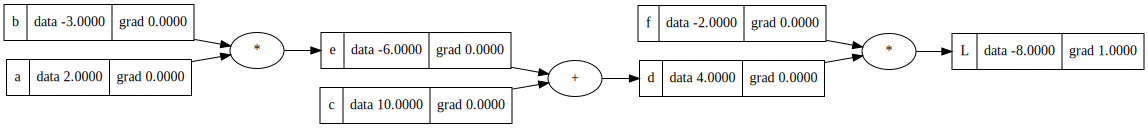

In [39]:
draw_dot(L)

---

#### dL/df and dL/dd

**Manually Calculating the Gradients**

```
L = d * f

dL/dd = f (By product rule)

OR

= [f(x+h) - f(h)] / h
= [((d + h)*f) - (d*f)] / h
= [d*f + h*f - d*f] / h 
= [h*f] / h
= f
```
  
So, by symmetry,
```
dL/df = d
```

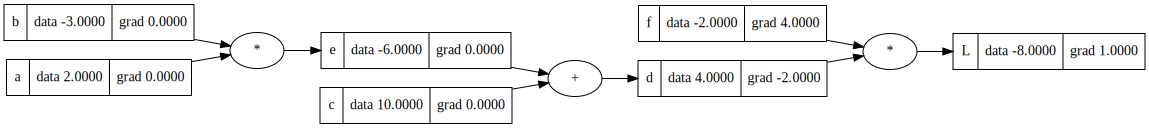

In [40]:
f.grad = 4 # Value of d
d.grad = -2.0 # Value of f

draw_dot(L)

In [41]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t f
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

3.9999999999995595


In [42]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t d
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'
    d.data += h

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

2.000100000003613


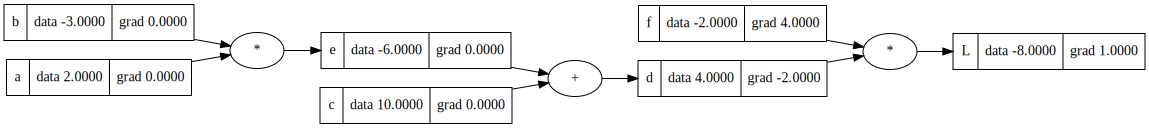

In [43]:
draw_dot(L)

---

#### dL/dc and dL/de

We know how `d` and `f` affect `L`. To find the effect of `c` on `L`, we need to find the effect of `c` on `d`

```
d = c + e

dd/dc = dc/dc + de/de = 1 + 0 = 1

dd/dc = [f(x + h) - f(x)]/h
      = [((c + h) + e) - (c + e)]/h
      = [c + h + e - c + e]/h
      = 1.0
```
  
So in case of addition, derivative is 1.  
Symmetrically,   
`dd/de = 1.0`

We can think of this as the local derivative because it is calculated w.r.t the current operation and not the whole graph till the end.

To compute gradients w.r.t other values, we need to apply [chain rule](https://en.wikipedia.org/wiki/Chain_rule).  
If a variable `z` depends on the variable `y`, which itself depends on the variable `x` (that is, `y` and `z` are dependent variables), then `z` depends on `x` as well, via the intermediate variable `y`.
  
Intuitively, the chain rule states that knowing the instantaneous rate of change of `z` relative to `y` and that of `y` relative to `x` allows one to calculate the instantaneous rate of change of `z` relative to `x` as the product of the two rates of change.
  
As put by George F. Simmons: "if a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."
  
Thus, we can understand that the derivative of a variable is the product of derivatives of the associated variables.

```
dL/dc = dL/dd + dd/dc
```

```
dd/dc = 1.0
dd/de = 1.0
d = c + e

What we want:
dL/dc = dL/dd + dd/dc           - Eq 1

What we know:
dL/dd
dd/dc
```

If we observe closely in Eq 1, we see that since `dd/dc = 1` (local derivative is 1), `dL/dc = dL/dd` i.e., we just copy `dL/dd` to `dL/dc`
  
So intuitively, the `+` node's local derivatives are `1.0`s hence they just route the derivatives as per the chain rule. Thus the derivative `dL/dd` just gets routed to both `c` and `e`.

In [44]:
# Derivative from d routes to c and e due to + operator

c.grad = -2
e.grad = -2

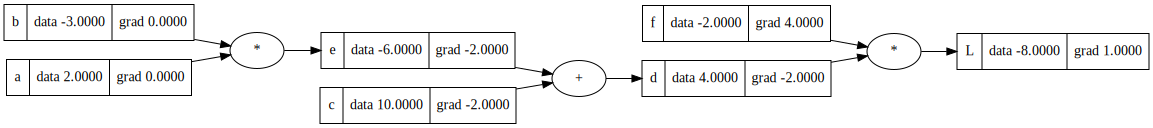

In [45]:
draw_dot(L)

In [46]:
# dL/de

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t e
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'
    e.data += h
    

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

-1.9999999999953388


In [47]:
# dL/dc

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t c
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 + h, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

-1.9999999999953388


#### dL/da and dL/db

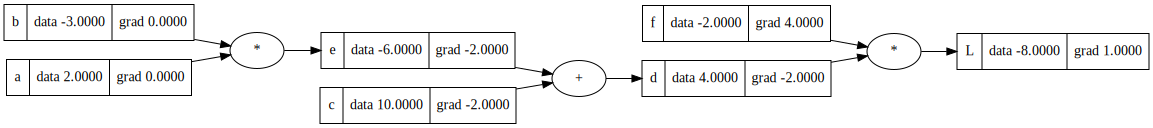

In [48]:
draw_dot(L)

```
dL/da = dL/de * de/da
      = -2.0 * b (dL/de was pre-calculated and as seen earlier for * operation the value of gradient is the data of the other variable)
      = -2.0 * -3.0

Similarly for 
dL/db = dL/de * de/db
      = -2.0 * a
      = -2.0 * 2.0
```

In [49]:
a.grad = -2.0 * -3.0 
b.grad = -2.0 * 2.0

In [50]:
# dL/da

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t a
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

6.000000000021544


In [51]:
# dL/db

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t b
    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

-4.000000000008441


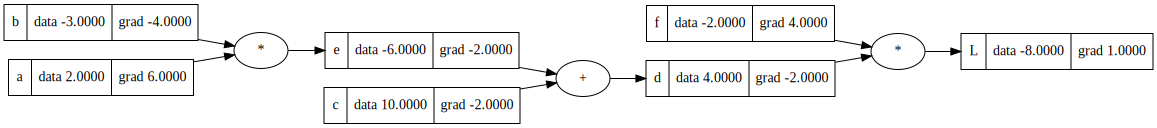

In [52]:
draw_dot(L)

### Single Optimization Step

Try to change the inputs in a way that the value of `L` increases i.e., becomes less negative. If we want `L` to go up, we need to move in the direction of the gradient.

In [53]:
# 0.01 is the step size
# We are changing values of the leaf nodes on which we have the control and move them in the direction of the gradient

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad 
c.data += 0.01 * c.grad 
f.data += 0.01 * f.grad

# Re-run forward pass with new values 
e = a * b 
d = e + c 
L = d * f 

print(L.data)

-7.286496


This was one step of optimization.